In [ ]:
try:
  %tensorflow_version 2.x
except Exception:
    pass

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense , Conv2D , Flatten , MaxPooling2D, Dropout,BatchNormalization
from keras.regularizers import l2
from tensorflow.keras.utils import normalize

tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 12549579591334007152, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14674281152
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7083360788455909254
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
#Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train=np.float32(X_train/255.0)
X_test=np.float32(X_test/255.0)

In [ ]:
#LConvert to float
#X_train_bis=normalize(X_train.astype(float))
#X_test_bis=normalize(X_test.astype(float))

In [ ]:
X_test.shape,X_train.shape

((10000, 32, 32, 3), (50000, 32, 32, 3))

In [ ]:
len(X_train[0]),len(X_train[0][0]),len(X_train[0][0][0])

(32, 32, 3)

In [ ]:
np.unique(y_train),np.unique(y_test)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

Ex3

In [ ]:
net1 = Sequential([Conv2D(filters=32, kernel_size=3, input_shape = (32,32,3), activation='relu'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Conv2D(filters=64, kernel_size=3, activation='relu'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Conv2D(filters=64, kernel_size=3, activation='relu'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Flatten(),
                   Dense(512, activation='relu'),
                   BatchNormalization(),
                   Dense(10, activation='softmax'),
                   ])

## Nombre de parametres par layer

In [ ]:
#premiere layer  
(3*3*3+1)*32

896

In [ ]:
#deuxieme layer, 32 est la profondeur
(3*3*32+1)*64

18496

In [ ]:
#troisieme layer 
(3*3*64+1)*64

36928

In [ ]:
#quatrieme layer
4*4*64

1024

In [ ]:
#Dense 1
512* (1024+1)

524800

In [ ]:
#Dense 2 
10*(512+1)

5130

Ex4

In [ ]:
net1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

Ex5

In [ ]:
from keras.callbacks import  ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import load_model

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=50)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
net1.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics = ['accuracy'])


In [ ]:
history = net1.fit(X_train, y_train, validation_split=0.2, epochs=30,batch_size=200, verbose=0,callbacks=[es, mc])
saved_model = load_model('best_model.h5')



Epoch 00001: val_accuracy improved from -inf to 0.11420, saving model to best_model.h5

Epoch 00002: val_accuracy improved from 0.11420 to 0.34040, saving model to best_model.h5

Epoch 00003: val_accuracy improved from 0.34040 to 0.58580, saving model to best_model.h5

Epoch 00004: val_accuracy improved from 0.58580 to 0.67100, saving model to best_model.h5

Epoch 00005: val_accuracy did not improve from 0.67100

Epoch 00006: val_accuracy did not improve from 0.67100

Epoch 00007: val_accuracy did not improve from 0.67100

Epoch 00008: val_accuracy improved from 0.67100 to 0.69170, saving model to best_model.h5

Epoch 00009: val_accuracy did not improve from 0.69170

Epoch 00010: val_accuracy did not improve from 0.69170

Epoch 00011: val_accuracy did not improve from 0.69170

Epoch 00012: val_accuracy did not improve from 0.69170

Epoch 00013: val_accuracy did not improve from 0.69170

Epoch 00014: val_accuracy improved from 0.69170 to 0.69540, saving model to best_model.h5

Epoch 00

Ex 7

In [ ]:
print('The 2nd model evaluation on the test set :\n Loss : {}\n Accuracy : {}'.
      format(net1.evaluate(X_test, y_test, verbose=2)[0], 
             net1.evaluate(X_test, y_test, verbose=2)[1]))

313/313 - 1s - loss: 2.0041 - accuracy: 0.6758
313/313 - 1s - loss: 2.0041 - accuracy: 0.6758
The 2nd model evaluation on the test set :
 Loss : 2.0040924549102783
 Accuracy : 0.6758000254631042


In [ ]:
tess_loss,test_accuracy =saved_model.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 1.5572 - accuracy: 0.6857


Ex 8

In [ ]:
print('The first image label is {} and the predicted label by the 1st model is {}'.
      format(y_test[0][0], 
             np.argmax(net1.predict(X_test[0].reshape(-1,32,32,3)))))

The first image label is 3 and the predicted label by the 1st model is 3


Ex 9 et 10

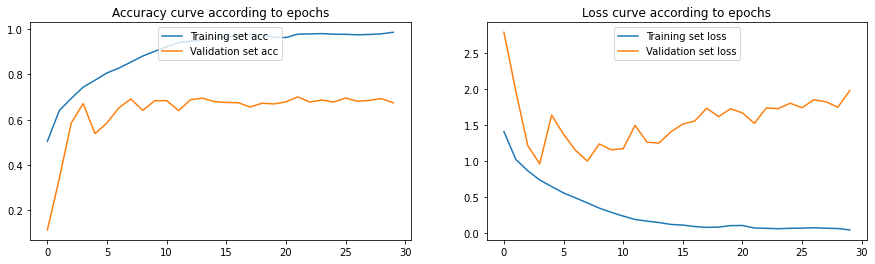

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training set acc')
plt.plot(history.history['val_accuracy'], label='Validation set acc')
plt.title('Accuracy curve according to epochs')
plt.legend(loc=9)

plt.subplot(122)
plt.plot(history.history['loss'], label='Training set loss')
plt.plot(history.history['val_loss'], label='Validation set loss')
plt.title('Loss curve according to epochs')
plt.legend(loc=9)
plt.show()

As we can see, our model is slightly overfitting : Around the 3rd epoch, the validation set accuracy and loss seems to stay stable and does not really change, while the training accuracy keeps improve and loss keeps decrease. 

Another CNN model with a different disposition of layers :
CNV − CONV − POOL − CONV − POOL − FC − FC

In [ ]:
net2 = Sequential([Conv2D(filters=32, kernel_size=5, input_shape = (32,32,3), activation='relu'),
                   BatchNormalization(),
                   Conv2D(filters=64, kernel_size=5, input_shape = (32,32,3), activation='relu'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Conv2D(filters=64, kernel_size=5, activation='relu'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Flatten(),
                   Dense(512, activation='relu'),
                   BatchNormalization(),
                   Dense(10, activation='softmax')
                   ])

In [ ]:
net2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
batch_normalization_8 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)        51264     
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 64)          102464    
_________________________________________________________________
batch_normalization_10 (Batc (None, 8, 8, 64)         

In [ ]:
net2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=50)
mc = ModelCheckpoint('best_model2.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history = net2.fit(X_train, y_train, validation_split=0.2, epochs=25,batch_size=200, verbose=0,callbacks=[es, mc])
saved_model2 = load_model('best_model2.h5')


Epoch 00001: val_accuracy improved from -inf to 0.16630, saving model to best_model2.h5

Epoch 00002: val_accuracy improved from 0.16630 to 0.29010, saving model to best_model2.h5

Epoch 00003: val_accuracy improved from 0.29010 to 0.56880, saving model to best_model2.h5

Epoch 00004: val_accuracy improved from 0.56880 to 0.64370, saving model to best_model2.h5

Epoch 00005: val_accuracy improved from 0.64370 to 0.67330, saving model to best_model2.h5

Epoch 00006: val_accuracy did not improve from 0.67330

Epoch 00007: val_accuracy improved from 0.67330 to 0.68400, saving model to best_model2.h5

Epoch 00008: val_accuracy improved from 0.68400 to 0.71690, saving model to best_model2.h5

Epoch 00009: val_accuracy improved from 0.71690 to 0.72070, saving model to best_model2.h5

Epoch 00010: val_accuracy did not improve from 0.72070

Epoch 00011: val_accuracy did not improve from 0.72070

Epoch 00012: val_accuracy did not improve from 0.72070

Epoch 00013: val_accuracy did not improve 

In [ ]:
print('The first image label is {} and the predicted label by the 2nd model is {}'.
      format(y_test[1][0], 
             np.argmax(net2.predict(X_test[1].reshape(-1,32,32,3)))))

The first image label is 8 and the predicted label by the 2nd model is 8


In [ ]:
tess_loss,test_accuracy =saved_model2.evaluate(X_test,y_test,verbose=2)

313/313 - 1s - loss: 1.3040 - accuracy: 0.7487


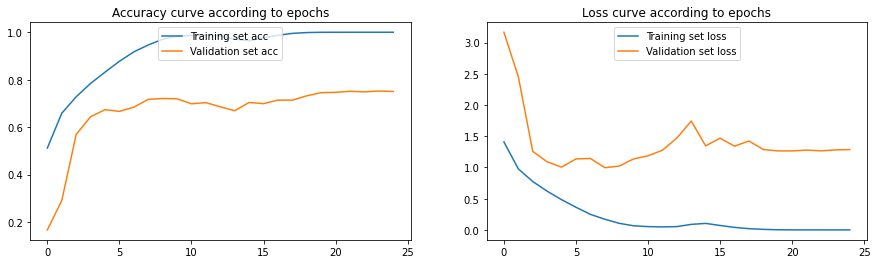

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(history.history['accuracy'], label='Training set acc')
plt.plot(history.history['val_accuracy'], label='Validation set acc')
plt.title('Accuracy curve according to epochs')
plt.legend(loc=9)

plt.subplot(122)
plt.plot(history.history['loss'], label='Training set loss')
plt.plot(history.history['val_loss'], label='Validation set loss')
plt.title('Loss curve according to epochs')
plt.legend(loc=9)

plt.show()

As there is random in neural network conception, the epoch from wihch the model starts overfitting change. But we can tell from the plots this smaller model seems to more overfits than the first one : On the loss plot, we can see that the validation curve slightly decreases and then rises again.

## Third CCN model 
CONV −CONV −POOL−CONV −POOL−CONV −CONV −CONV −POOL−FC−FC−FC

In [ ]:
net3 = Sequential([Conv2D(filters=96, kernel_size=3, input_shape = (32,32,3), activation='relu', strides=1),
                   Conv2D(filters=96, kernel_size=3, activation='relu', strides=1),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Dropout(rate=0.5),

                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Dropout(rate=0.5),

                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1),
                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1),
                   ])

In [ ]:
net3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 96)        2688      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 96)        83040     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 96)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 96)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 12, 12, 128)       110720    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)        

In [ ]:
net3 = Sequential([Conv2D(filters=96, kernel_size=3, input_shape = (32,32,3), activation='relu', strides=1, padding='same'),
                   BatchNormalization(),                   
                   Conv2D(filters=96, kernel_size=3, activation='relu', strides=1, padding='same'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Dropout(rate=0.5),

                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Dropout(rate=0.5),

                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
                   BatchNormalization(),
                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
                   BatchNormalization(),
                   Conv2D(filters=128, kernel_size=3, activation='relu', strides=1, padding='same'),
                   BatchNormalization(),
                   MaxPooling2D(pool_size=(2,2), strides=2),
                   Dropout(rate=0.5),
                   
                   Flatten(),
                   Dense(1024, activation='relu', kernel_regularizer=l2(0.0005)),
                   Dropout(rate=0.5),
                   Dense(512, activation='relu', kernel_regularizer=l2(0.0005)),
                   Dropout(rate=0.5),
                   Dense(10, activation='softmax', kernel_regularizer=l2(0.0005))

                   ])

In [ ]:
net3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 96)        2688      
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 96)        83040     
_________________________________________________________________
batch_normalization_21 (Batc (None, 32, 32, 96)        384       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 96)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 96)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 16, 16, 128)      

In [ ]:
net3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=50)
mc = ModelCheckpoint('best_model3.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
history3 = net3.fit(X_train, y_train, validation_split=0.2, epochs=25,batch_size=200, verbose=0,callbacks=[es, mc])
saved_model3= load_model('best_model3.h5')


Epoch 00001: val_accuracy improved from -inf to 0.09520, saving model to best_model3.h5

Epoch 00002: val_accuracy improved from 0.09520 to 0.15340, saving model to best_model3.h5

Epoch 00003: val_accuracy improved from 0.15340 to 0.23610, saving model to best_model3.h5

Epoch 00004: val_accuracy improved from 0.23610 to 0.57430, saving model to best_model3.h5

Epoch 00005: val_accuracy improved from 0.57430 to 0.58830, saving model to best_model3.h5

Epoch 00006: val_accuracy improved from 0.58830 to 0.59680, saving model to best_model3.h5

Epoch 00007: val_accuracy improved from 0.59680 to 0.63100, saving model to best_model3.h5

Epoch 00008: val_accuracy improved from 0.63100 to 0.69180, saving model to best_model3.h5

Epoch 00009: val_accuracy improved from 0.69180 to 0.76250, saving model to best_model3.h5

Epoch 00010: val_accuracy did not improve from 0.76250

Epoch 00011: val_accuracy improved from 0.76250 to 0.77330, saving model to best_model3.h5

Epoch 00012: val_accuracy 

In [ ]:
print('The 3rd model evaluation on the test set :\n Loss : {}\n Accuracy : {}'.
      format(net3.evaluate(X_test, y_test, verbose=0)[0], 
             net3.evaluate(X_test, y_test, verbose=0)[1]))

The 3rd model evaluation on the test set :
 Loss : 0.8970509767532349
 Accuracy : 0.7983999848365784


In [ ]:
tess_loss,test_accuracy =saved_model3.evaluate(X_test,y_test,verbose=2)

313/313 - 2s - loss: 0.8349 - accuracy: 0.8243


In [ ]:
print('The first image label is {} and the predicted label by the 3rd model is {}'.
      format(y_test[0][0], 
             np.argmax(net3.predict(X_test[0].reshape(-1,32,32,3)))))

The first image label is 3 and the predicted label by the 3rd model is 3


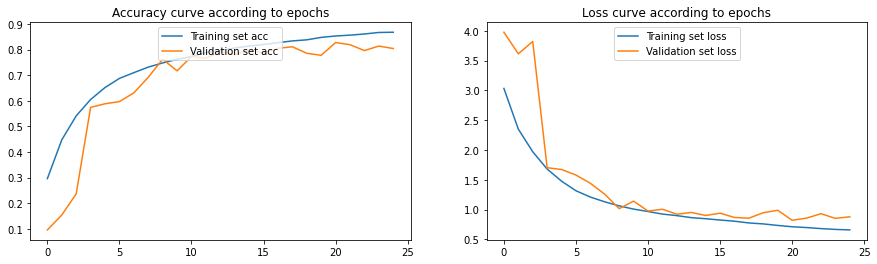

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(history3.history['accuracy'], label='Training set acc')
plt.plot(history3.history['val_accuracy'], label='Validation set acc')
plt.title('Accuracy curve according to epochs')
plt.legend(loc=9)

plt.subplot(122)
plt.plot(history3.history['loss'], label='Training set loss')
plt.plot(history3.history['val_loss'], label='Validation set loss')
plt.title('Loss curve according to epochs')
plt.legend(loc=9)

plt.show()

With this 3rd model, we can see we are no more doing overfitting. The validation set and the training follows the same deviation (the prediction on the validation set are even more accurate than those on the training). <br>
However, we can see that our model seems to be a bit unstable on the validation set.

ResNet archicture


In [ ]:
from tensorflow.keras import layers
inp = tf.keras.Input(shape=(32,32,3))

x = layers.Conv2D(16, (3,3),(2,2), activation='relu')(inp)
x = layers.Conv2D(32, (3,3),(2,2), activation='relu')(x)
block1 = layers.MaxPool2D(pool_size=(2,2))(x)

x = layers.Conv2D(32, (3,3), activation='relu', padding="same")(block1)
#x = layers.Conv2D(32, (3,3), activation='relu', padding="same")(x)
block2 = layers.add([x, block1])

x = layers.Conv2D(32, (3,3), activation='relu', padding="same")(block2)
#x = layers.Conv2D(32, (3,3), activation='relu', padding="same")(x)
block3 = layers.add([x, block2])

x = layers.GlobalAveragePooling2D()(block3)
x = layers.Dense(100, activation='relu')(x)
out = layers.Dense(10, activation='softmax')(x)

model = keras.Model(inputs=inp, outputs=out)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode='auto', verbose=0,patience=50)
mc = ModelCheckpoint('best_model4.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)